In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [89]:
red_df = pd.read_csv('Data/winequality-red.csv',sep=';')
white_df = pd.read_csv('Data/winequality-white.csv',sep=';')

In [90]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [91]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [92]:
selected_features = red_df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]]

In [93]:
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(selected_features)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

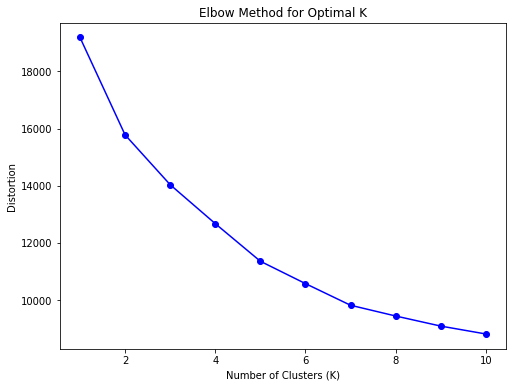

In [94]:
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_feature)
    distortions.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

## Clustering for Red Wine

In [95]:
num_cluster = 5

kmeans = KMeans(n_clusters=num_cluster,random_state=0)
cluster_labels = kmeans.fit_predict(scaled_feature)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [96]:
red_df['Cluster'] = cluster_labels
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [97]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[-0.07787152  0.08657659  0.09863333  0.43655804  0.027587    1.09080506
   1.38151861  0.38575257 -0.15324414 -0.18722975 -0.61683168 -0.46205596]
 [-0.48368545  0.67553186 -0.79151688 -0.23158674 -0.0783658  -0.40177577
  -0.38452162 -0.09555925  0.40966381 -0.41966846 -0.42575728 -0.4652754 ]
 [-0.59969859 -0.48503764 -0.10817614 -0.22183429 -0.3807964   0.18401003
  -0.20163987 -1.13900232  0.52855117  0.2002653   1.21505413  0.83255362]
 [ 1.36726989 -0.67497657  1.14004813  0.1982924  -0.01490265 -0.53858341
  -0.52344787  0.83323017 -0.84119353  0.3303861   0.17210406  0.40240871]
 [ 0.06532185  0.0103135   1.10416018 -0.4082848   5.52313653 -0.08685714
   0.50070009  0.18055137 -1.67454694  3.62449166 -0.88828122 -0.37493231]]


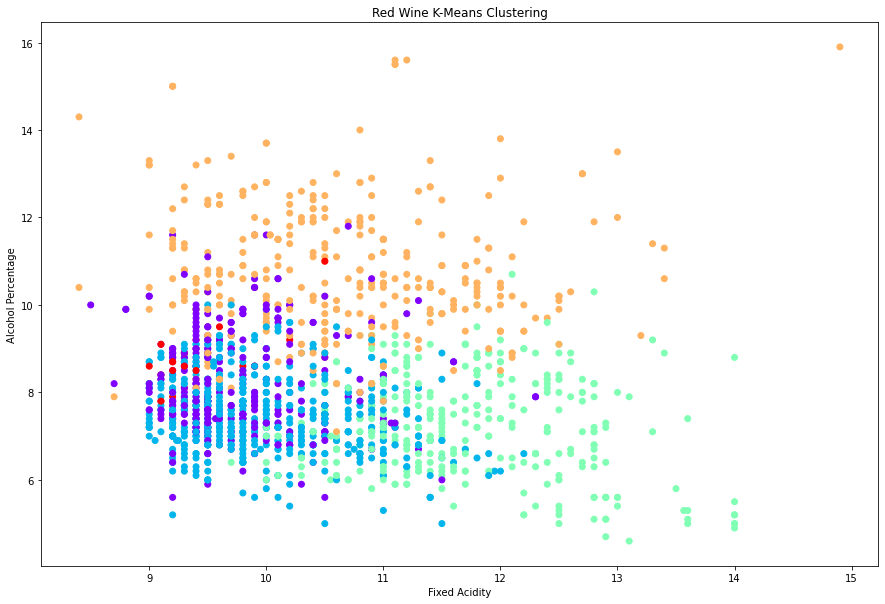

In [98]:
plt.figure(figsize=(15,10))
plt.scatter(red_df["alcohol"], red_df["fixed acidity"], c=cluster_labels, cmap='rainbow')
plt.xlabel("Fixed Acidity")
plt.ylabel("Alcohol Percentage")
plt.title("Red Wine K-Means Clustering")
plt.show()

## Clustering for White Wine

In [110]:
selected_features = white_df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]]

In [111]:
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(selected_features)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

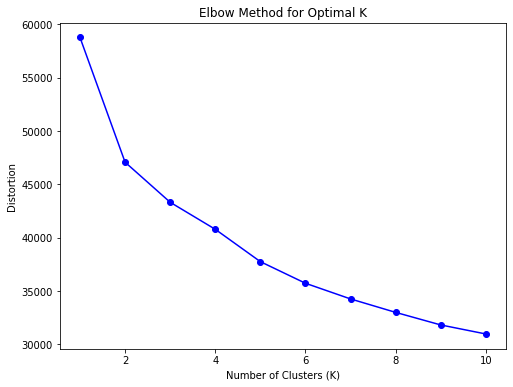

In [112]:
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_feature)
    distortions.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [118]:
num_cluster = 5

kmeans = KMeans(n_clusters=num_cluster,random_state=0)
cluster_labels = kmeans.fit_predict(scaled_feature)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [119]:
white_df['Cluster'] = cluster_labels
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,4
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


In [120]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[-5.14726842e-01 -2.20466479e-02 -4.93690987e-01 -3.81122555e-01
   5.27668629e-02 -1.95171723e-01  2.86364326e-02 -1.32203364e-02
   7.61952013e-01  2.26985393e-01 -3.48479672e-01 -3.24451033e-01]
 [-5.45718632e-01  8.16664122e-02 -1.72850652e-01 -5.45069525e-01
  -4.95045980e-01 -2.00260754e-01 -6.09278371e-01 -1.04405746e+00
   3.02053913e-01  3.37640935e-03  1.21182970e+00  9.36580904e-01]
 [ 2.01746054e-01  1.60384286e-02  3.05854864e-01  1.14523374e+00
   1.33686774e-01  7.33187561e-01  8.63153444e-01  1.13691946e+00
  -3.23037895e-01  3.84893315e-02 -8.68439447e-01 -2.96877051e-01]
 [-1.96861758e-01  3.66132481e-01  9.13377439e-01 -3.42439946e-01
   5.37436139e+00  2.98929997e-01  1.32932013e-01  1.23998820e-01
  -6.06473586e-01 -2.30964369e-01 -7.67541336e-01 -4.26751889e-01]
 [ 9.80578439e-01 -1.35204688e-01  2.38510492e-01 -5.17327498e-01
  -2.25834316e-01 -6.21793666e-01 -5.54808317e-01 -3.75235970e-01
  -7.10570769e-01 -2.95850956e-01  2.69901692e-01 -2.84889897e-01]]


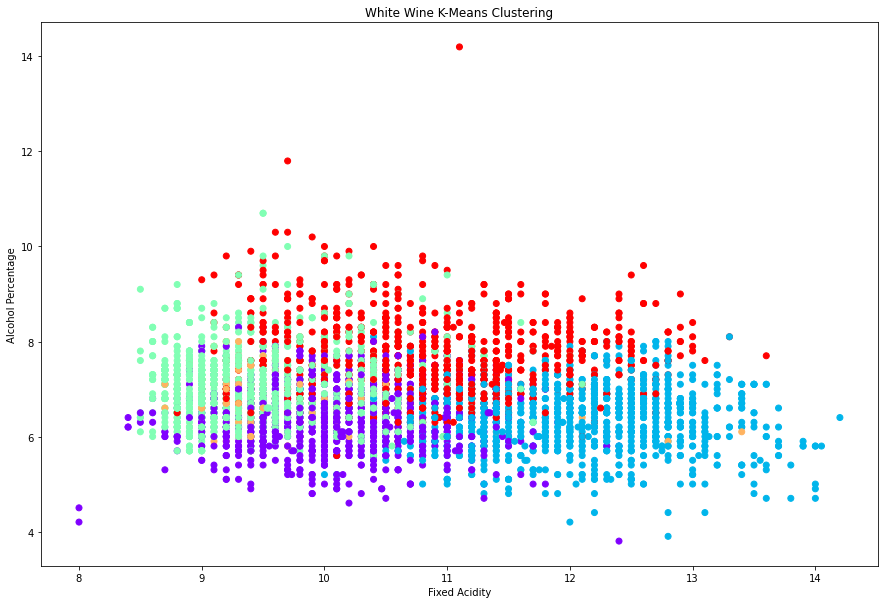

In [121]:
plt.figure(figsize=(15,10))
plt.scatter(white_df["alcohol"], white_df["fixed acidity"], c=cluster_labels, cmap='rainbow')
plt.xlabel("Fixed Acidity")
plt.ylabel("Alcohol Percentage")
plt.title("White Wine K-Means Clustering")
plt.show()